# HR Dataset Analysis 

Adrienne Hill

12.4.2018

IS 685 

University of Nevada, Reno


# Introduction to Data, Motivation and Hypothesis

The human resources dataset used for this project is from Kaggle and has 10 attributes describing employee characteristics. There are 14,999 rows of data, and the dataset has been widely used online to to model and predict employee turnover. However, I will use the attributes of the daaset to see if they are predictors of "Employee Satisfaction" and "Promotion Last 5 Years" rather than employee turnover, aka "Left". While employee turnover is a critical HR metric, so is employee satisfaction because "People who like their job and who are proud of their company are generally more engaged, even if the work environment is stressful and pressure is high" (Vulpen, 2018). Promotion within the last five years also indicates the performance of an employee, whether high potential employees stay at the company and whether the company has made a worthwhile investment. 

The goal of this analysis is to understand which features in the dataset contribute the greatest to employee promotion and employee satisfaction and to compare the performance of regression and Support Vector Regression (SVR) in my anaylysis. Support Vector Regression plots errors within a plane rather than one using a line of best fit in regrassion. The result is are two boundary lines around the line of best fit which gives us a decision boundary or a margin of tolerance. I expect that the SVR model will outperform the regression model because it is more tolerant of error (Bhattacharyya, 2018).

# Cleaning and Exploratory Data Analysis

In [4]:
import pip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import os

In [5]:
# pd.set_option('display.max_columns',15)

pd.reset_option('display.max_columns')

In [6]:
df = pd.read_csv('/Users/adriennehill/Library/Mobile Documents/com~apple~CloudDocs/Classes/IS685/IS 685 Project/HR_Data.csv') 
data.shape

NameError: name 'data' is not defined

In [ ]:
df.head()

In [ ]:
df.info()

Finding Missing Data

In [ ]:
def missingData (data):
    totalempty = data.isnull().sum().sort_values (ascending = False)
    percentempty = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing_data = pd.concat([totalempty, percentempty], axis =1, keys = ['TotalMissing', 'PercentMissing'])
    return missing_data

In [ ]:
missingData(df)

There aren't any missing data from the HR data set--very clean! The data types are consistent and don't need to be corrected at this time. I will move on to exploratory data analysis. 

# Exploratory Data Analysis 

In [ ]:
df.describe()

The mean satisfaction level is 0.61 which is lower than desired for most companies but above 0.5. The standard deviation is .25 which shows satisfaction level varies greatly in the company. 

Descriptive Data By Promotion In The Last 5 Years

In [ ]:
promotiondescribe = df.groupby(['promotion_last_5years']).describe()

with pd.option_context('display.max_rows', 100, 'display.max_columns', 56):
    display(promotiondescribe)


By grouping 'promotion_last_5years' we can see the means of the other features. 
* The average monthy hours between employees who received a promotion or not differs by less than two hours. 
* The average number of projects is slightly greater for those who did not receive a promotion though it may not be statistically significant. 
* The average satisfaction level among this with a promotion is slightly greater than those without a promotion; Are employees more satisfied when they have been promoted or are those who are more satisfied more likely to seek a promotion? Just a thought. 
* The average time spent at the company for employees who received a promotion is 4.17 years and 3.48 years for employees who did not. This makes sense since time and experience result in seniority, however, even a promotion doesn't prevent the large attrition that occurs after 5 years as was seen in the histogram earlier. 

In [ ]:
num_bins = 10 

df.hist(bins= num_bins, figsize = (20,15))
plt.savefig('HR_Histogram_Plots')
plt.show()

Notes: From the histograms, we see that employee satisfaction level is left skewed and the mean is less than the median. Employee satisfaction does seem to skew high or over 0.5. Very few people were promoted in the last five years which I believe could depress employee satisfaction. The time spent at the company is right skewed, so the mean is greater than the median and the company has a hard time retaining emloyees for over five years. 

In [ ]:
corr_matrix = df.corr()
corr = np.corrcoef(df.corr())
mask = np.zeros_like (corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,5))
with sns.axes_style('white'):
    sns.heatmap(corr_matrix, mask= mask, annot = True, linewidths= .3, cmap = 'YlGnBu')
plt.savefig('HR_Correlation_Matrix')

plt.show()

* The correlation Matrix shows that there are few strong correlations between the features. Average monthly hours and number of project have the strongest correlation at 0.42 which is still low. 
* The strongest correlation with satisfaction level is Left at -0.39 followed by last evaluation at 0.11.  
* The strongest correlation with promotion in the last five years is time spent at company at 0.067--an obvious correlation but still a weak correlation!

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
NoPromotion=df[df.promotion_last_5years==0]
Promotion=df[df.promotion_last_5years==1]
sns.kdeplot(Promotion.satisfaction_level,shade=True,color="b",ax=ax[0],legend=False)
ax[0].set_xlabel("Satisfaction Level")
ax[0].set_ylabel("Density")
ax[0].set_title("Employees Promoted")
sns.kdeplot(NoPromotion.satisfaction_level,shade=True,color="y",ax=ax[1],legend=False)
ax[1].set_xlabel("Satisfaction Level")
ax[1].set_ylabel('Density')
ax[1].set_title('Employees Not Promoted')
plt.suptitle("Satisfaction level Vs Promotion",fontsize=16)

In [ ]:
# List the Promotion Variables
Promo = [0, 1]

# Iterate through the five airlines
for Promoted in Promo:
    # Subset to the airline
    subset = df[df['promotion_last_5years'] == Promoted]
    
    # Draw the density plot
    sns.distplot(subset['satisfaction_level'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = Promoted)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Promotion?')
plt.title('Density Plot Promotion in Last five Years')
plt.xlabel('Satisfaction Level')
plt.ylabel('Density')
plt.savefig('HR_Satisfaction_Level_Density_Plot')

The density plot between promotion and satisfaction show that the distribution for employees who received a promotion is more concentrated from 0.6 through 0.8 satisfaction level whereas the distribution for employees who didn't receive a promotion has two peaks around 0.1 and 0.6 through 0.8 satisfaction level. The density graphs overlap quite a bit which means there will be little to differentiate employees who received a promotion and those who didn't by satisfaction level. 

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(12,5))
NoPromotion=df[df.promotion_last_5years==0]
Promotion=df[df.promotion_last_5years==1]
sns.kdeplot(Promotion.time_spend_company,shade=True,color="b",ax=ax[0],legend=False)
ax[0].set_xlabel("Years at Company")
ax[0].set_ylabel("Density")
ax[0].set_title("Employees Promoted")
sns.kdeplot(NoPromotion.time_spend_company,shade=True,color="y",ax=ax[1],legend=False)
ax[1].set_xlabel("Years at Company")
ax[1].set_ylabel('Density')
ax[1].set_title('Employees Not Promoted')
plt.suptitle("Years at Company Vs Promotion",fontsize=16)

In [ ]:
# List the Promotion Variables
Promo = [0, 1]

# Iterate through the five airlines
for Promoted in Promo:
    # Subset to the airline
    subset = df[df['promotion_last_5years'] == Promoted]
    
    # Draw the density plot
    sns.distplot(subset['time_spend_company'], hist = False, kde = True,
                 kde_kws = {'shade': True,'linewidth': 3},
                 label = Promoted)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Promotion?')
plt.title('Density Plot Promotion in Last five Years')
plt.xlabel('Years at Company')
plt.ylabel('Density')
plt.savefig('HR_Year_At_Company_Density_Plot')

The density plots between promotion and years at company show that the distribution for employees who received a promotion is more concentrated from 2 to four years at the company whereas the distribution for employees who didn't receive a promotion has peaks strong peaks at years 2, 3 and 4 years and then tapers off. The density graphs overlap less than satisfaction which means there is more to differentiate employees who received a promotion and those who didn't by years at the company, but this is not surprising nor very insightful. 

# ECDFs  

ECDF for Satisfaction Level

In [92]:
# Percentile Calculation
percentiles = np.array([2.5, 25, 50, 75, 97.5])

ptiles_amount = np.percentile(df['satisfaction_level'], percentiles)
print('Percenitle Satisfaction Level: {}'.format(ptiles_amount))

Percenitle Satisfaction Level: [0.1  0.44 0.64 0.82 0.98]


In [93]:
# ECDF for satisfaction 

def ecdf(df):
    n = len(df)
    x = np.sort(df)
    y = np.arange (1, n+1) / n
    
    return x, y 

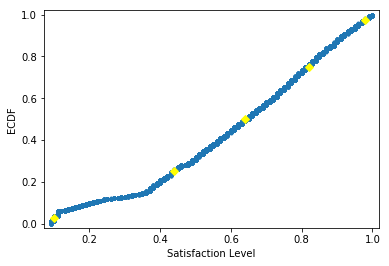

<Figure size 432x288 with 0 Axes>

In [94]:
# Compute ECDF for Satisfaction Level
x, y = ecdf(df['satisfaction_level'])

3# Generate Plot
_ = plt.plot(x, y, marker = '.', linestyle = 'none')

plt.margins(0.02)

_= plt.plot(ptiles_amount, percentiles/100, marker = 'D', color = 'yellow', linestyle = 'none')

_= plt.xlabel('Satisfaction Level')
_= plt.ylabel('ECDF')

plt.show()
plt.savefig('HR_Satisfaction_ECDF')

The ECDF for Satisfaction Level shows how employee satisfaction is stratified; 25% of employees' satisfaction level is around .45 or less and 75% of employees'satisfaction level is around .85 or less. The first quartile of employee's satisfaction is flat and then increases steadily afterward. 

ECDF for Time Spent at Company

In [95]:
# Percentile Calculation
percentiles = np.array([2.5, 25, 50, 75, 97.5])

ptiles_amount = np.percentile(df['time_spend_company'], percentiles)
print('Percenitle Time Spent at Company Level: {}'.format(ptiles_amount))

Percenitle Time Spent at Company Level: [2. 3. 3. 4. 8.]


In [96]:
# ECDF for satisfaction 

def ecdf(df):
    n = len(df)
    x = np.sort(df)
    y = np.arange (1, n+1) / n
    
    return x, y 

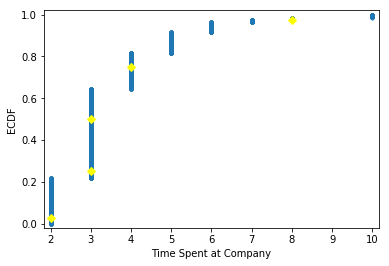

<Figure size 432x288 with 0 Axes>

In [97]:
# Compute ECDF for Satisfaction Level
x, y = ecdf(df['time_spend_company'])

3# Generate Plot
_ = plt.plot(x, y, marker = '.', linestyle = 'none')

plt.margins(0.02)

_= plt.plot(ptiles_amount, percentiles/100, marker = 'D', color = 'yellow', linestyle = 'none')

_= plt.xlabel('Time Spent at Company')
_= plt.ylabel('ECDF')

plt.show()
plt.savefig('HR_Time_Spent_ECDF')

The ECDF for Time Spent at Company shows 75% of employees have spent less than four years at the company and only 25% of employees have more than four years at the company.

ECDF for Average Monthly Hours

In [98]:
# Percentile Calculation
percentiles = np.array([2.5, 25, 50, 75, 97.5])

ptiles_amount = np.percentile(df['average_montly_hours'], percentiles)
print('Percenitle Average Monthly Hours Level: {}'.format(ptiles_amount))

Percenitle Average Monthly Hours Level: [118. 156. 200. 245. 286.]


In [99]:
# ECDF for satisfaction 

def ecdf(df):
    n = len(df)
    x = np.sort(df)
    y = np.arange (1, n+1) / n
    
    return x, y 

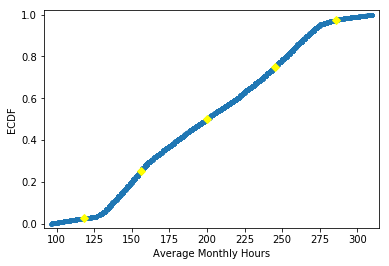

<Figure size 432x288 with 0 Axes>

In [100]:
# Compute ECDF for Satisfaction Level
x, y = ecdf(df['average_montly_hours'])

3# Generate Plot
_ = plt.plot(x, y, marker = '.', linestyle = 'none')

plt.margins(0.02)

_= plt.plot(ptiles_amount, percentiles/100, marker = 'D', color = 'yellow', linestyle = 'none')

_= plt.xlabel('Average Monthly Hours')
_= plt.ylabel('ECDF')

plt.show()
plt.savefig('HR_Monthly_Hours_ECDF')

The ECDF for Average Monthly Hours shows how half of employees work than more than 200 hours a month and half work less than 200 hours a month. Average monthly working hours range from 160-185 hours depending on the month, so most employees are working over 40 hour weeks. 

# PCA Principle Component Analysis With Promotion As Target

There aren't strong correlations between my chosen two target features and other features in the data set, so I will preform PCA to reduce the dimensionality and find the principle components in the data set. I did this use a pipeline function and a second method using eigen values which "explain the variance of the data along the new feature axes" (Raschka, 2015). I then used the eigen values to plot the explained variance of the values.

In [19]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [20]:
# Separating out the features
X = df.loc[:, ['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

In [21]:
# Separating out the target
y = df.loc[:,['promotion_last_5years']].values

In [22]:
# Make X a DataFrame
df_x = pd.DataFrame(X,)
# Make y a DataFrame
df_y = pd.DataFrame(y, columns=['promotion_last_5years'])
# Concatenate them together
df = pd.concat([df_x, df_y], axis = 1)
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years
0,0.38,0.53,2,157,3,0
1,0.80,0.86,5,262,6,0
2,0.11,0.88,7,272,4,0
3,0.72,0.87,5,223,5,0
4,0.37,0.52,2,159,3,0


In [23]:
# Create scaler: scaler
scaler = StandardScaler()

In [24]:
# Create a PCA instance: pca
pca = PCA()

In [25]:
# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

In [26]:
# Fit the pipeline to HR DF above
pipeline.fit(df)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [27]:
print(pca.components_)

[[-0.08661249  0.50724217  0.57890828  0.5491243   0.31370648  0.0109369 ]
 [-0.81774884 -0.37033704  0.106784   -0.12913349  0.39915682  0.08205403]
 [ 0.2409124   0.0142902  -0.09657111 -0.07528916  0.32177568  0.90731636]
 [ 0.32790084  0.06733132 -0.19113335 -0.25110652  0.78817534 -0.40882848]
 [-0.2763131   0.71193933 -0.00128488 -0.63210154 -0.12044203  0.05227982]
 [ 0.28614408 -0.30652984  0.77948881 -0.46207332 -0.05473429 -0.00711564]]


In [28]:
print(pca.explained_variance_)

[1.82986719 1.10980401 1.03158507 0.84593482 0.63410949 0.54909947]


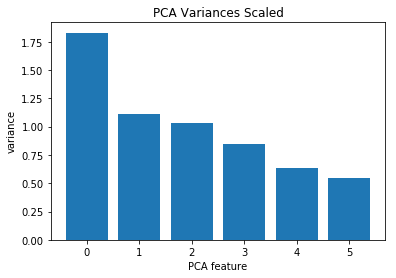

In [29]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.title('PCA Variances Scaled')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Eigen Vectors and Eigen Values


In [30]:
# Standardizing the features
X_std = StandardScaler().fit_transform(X)

In [31]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728 ]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995 ]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668]]


In [32]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00006668  0.10502822 -0.14297912 -0.02004945 -0.1008728 ]
 [ 0.10502822  1.00006668  0.34935588  0.33976445  0.1315995 ]
 [-0.14297912  0.34935588  1.00006668  0.41723845  0.19679901]
 [-0.02004945  0.33976445  0.41723845  1.00006668  0.12776343]
 [-0.1008728   0.1315995   0.19679901  0.12776343  1.00006668]]


In [33]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.08688429 -0.83127011  0.3820556  -0.28524747 -0.27222882]
 [ 0.50740199 -0.36996992  0.04741566  0.30553046  0.71419072]
 [ 0.57907693  0.11257602 -0.20954619 -0.77977926 -0.00559089]
 [ 0.54928085 -0.12457178 -0.25376183  0.46267183 -0.63585544]
 [ 0.31297732  0.37936893  0.86225321  0.05625046 -0.10714332]]

Eigenvalues 
[1.82976857 1.10920534 0.87718038 0.54912136 0.63505773]


In [34]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.08688429 -0.83127011  0.3820556  -0.28524747 -0.27222882]
 [ 0.50740199 -0.36996992  0.04741566  0.30553046  0.71419072]
 [ 0.57907693  0.11257602 -0.20954619 -0.77977926 -0.00559089]
 [ 0.54928085 -0.12457178 -0.25376183  0.46267183 -0.63585544]
 [ 0.31297732  0.37936893  0.86225321  0.05625046 -0.10714332]]

Eigenvalues 
[1.82964658 1.10913139 0.8771219  0.54908475 0.63501539]


In [35]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.08688429,  0.83127011, -0.3820556 ,  0.27222882, -0.28524747],
       [ 0.50740199,  0.36996992, -0.04741566, -0.71419072,  0.30553046],
       [ 0.57907693, -0.11257602,  0.20954619,  0.00559089, -0.77977926],
       [ 0.54928085,  0.12457178,  0.25376183,  0.63585544,  0.46267183],
       [ 0.31297732, -0.37936893, -0.86225321,  0.10714332,  0.05625046]])

In [36]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [37]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.8296465785482663
1.1091313896296273
0.8771218964505343
0.6350153901788772
0.5490847451926956


In [38]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

Cumulative Explained Variance Plot

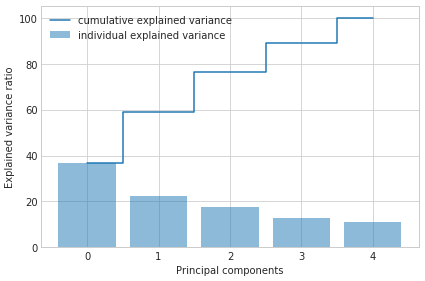

In [39]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(5), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(5), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

# PCA With Employee Satisfaction As Target

In [81]:
# Separating out the features
X2 = df.loc[:, ['promotion_last_5years','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

In [82]:
# Separating out the target
y2 = df.loc[:,['satisfaction_level']].values

In [83]:
# Make X a DataFrame
df_x2 = pd.DataFrame(X2,)
# Make y a DataFrame
df_y2 = pd.DataFrame(y2, columns=['satisfaction_level'])
# Concatenate them together
df2 = pd.concat([df_x2, df_y2], axis = 1)
df2.head()


,promotion_last_5years,last_evaluation,number_project,average_montly_hours,time_spend_company,satisfaction_level
0,0,0.53,2,157,3,0.38
1,0,0.86,5,262,6,0.80
2,0,0.88,7,272,4,0.11
3,0,0.87,5,223,5,0.72
4,0,0.52,2,159,3,0.37


In [84]:
# Create scaler: scaler
scaler= StandardScaler()

In [85]:
# Create a PCA instance: pca
pca = PCA()

In [86]:
# Create pipeline: pipeline
pipeline2 = make_pipeline(scaler, pca)

In [87]:
# Fit the pipeline to HR DF above
pipeline2.fit(df2)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [88]:
scaler()

TypeError: 'StandardScaler' object is not callable

In [89]:
print(pca.components_)

[[ 0.0109369   0.50724217  0.57890828  0.5491243   0.31370648 -0.08661249]
 [ 0.08205403 -0.37033704  0.106784   -0.12913349  0.39915682 -0.81774884]
 [ 0.90731636  0.0142902  -0.09657111 -0.07528916  0.32177568  0.2409124 ]
 [-0.40882848  0.06733132 -0.19113335 -0.25110652  0.78817534  0.32790084]
 [ 0.05227982  0.71193933 -0.00128488 -0.63210154 -0.12044203 -0.2763131 ]
 [-0.00711564 -0.30652984  0.77948881 -0.46207332 -0.05473429  0.28614408]]


In [90]:
print(pca.explained_variance_)

[1.82986719 1.10980401 1.03158507 0.84593482 0.63410949 0.54909947]


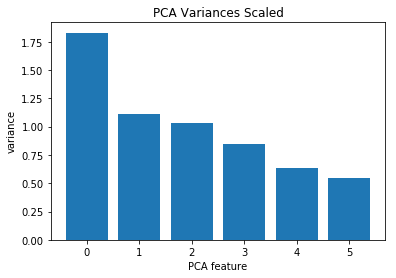

In [91]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.title('PCA Variances Scaled')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()